<a href="https://colab.research.google.com/github/Shankars57/Deep_Learning/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4978 - loss: 875.9761 - val_accuracy: 0.5043 - val_loss: 54.8953
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5061 - loss: 145.3312 - val_accuracy: 0.4953 - val_loss: 5.1481
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5048 - loss: 19.6627 - val_accuracy: 0.4966 - val_loss: 0.7097
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5099 - loss: 1.4089 - val_accuracy: 0.5008 - val_loss: 0.6931
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5006 - loss: 0.8638 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5037 - loss: 0.7453 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4986 - loss: 0.7310 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4902 - loss: 0.7236 - val_accuracy: 0.500

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67     12500
    Positive       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000

Test score: 0.6931474208831787
Test accuracy: 0.5


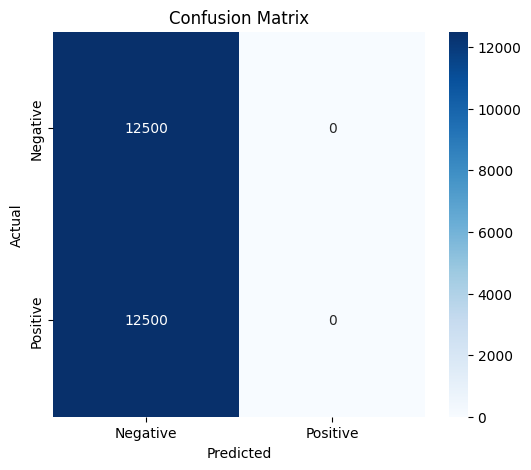

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

# Load IMDB dataset
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=30000)

# Pad the sequences to ensure uniform input size
maxlen = 400
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, batch_size=256, epochs=30, validation_data=(X_test, Y_test))

# Evaluate the model on the test set
score, acc = model.evaluate(X_test, Y_test, batch_size=256)

# Print accuracy
print('Accuracy: %.2f%%' % (acc * 100))

# Predict the classes
Y_pred = (model.predict(X_test) > 0.5).astype('int32')

# Print classification report
print(classification_report(Y_test, Y_pred, target_names=['Negative', 'Positive']))

# Print test score and accuracy
print('Test score:', score)
print('Test accuracy:', acc)

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Adding labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
